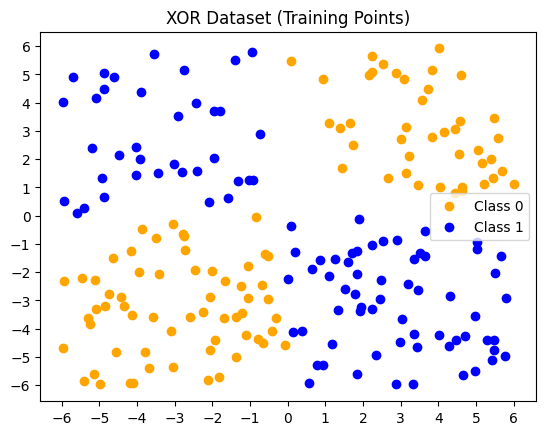

In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn 
import torch.optim as optim  



torch.manual_seed(42)
n_samples = 400  
X = torch.rand(n_samples, 2) * 12 - 6 
y = (X[:, 0] > 0).int() ^ (X[:, 1] > 0).int()  

X_train, X_test = X[:200], X[200:]  
y_train, y_test = y[:200], y[200:]  



plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='orange', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')

plt.xticks(np.arange(-6, 7, 1))
plt.yticks(np.arange(-6, 7, 1))

plt.title('XOR Dataset (Training Points)')
plt.legend()
plt.show()


In [2]:
print(X_train.shape[0])
print(X_test.shape[0])

200
200


MLP model with no regularization on XOR dataset

Epoch [100/1000], Loss: 0.5112
Epoch [200/1000], Loss: 0.2313
Epoch [300/1000], Loss: 0.1114
Epoch [400/1000], Loss: 0.0704
Epoch [500/1000], Loss: 0.0499
Epoch [600/1000], Loss: 0.0377
Epoch [700/1000], Loss: 0.0297
Epoch [800/1000], Loss: 0.0241
Epoch [900/1000], Loss: 0.0200
Epoch [1000/1000], Loss: 0.0169


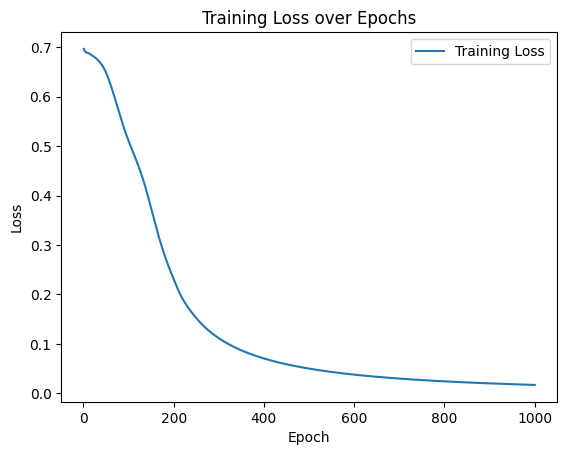

Test Accuracy: 96.50%


In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 8)  
        self.fc2 = nn.Linear(8, 4) 
        self.fc3 = nn.Linear(4, 1)  

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x)) 
        x = torch.sigmoid(self.fc2(x)) 
        x = torch.sigmoid(self.fc3(x)) 
        return x


model5 = MLP()  
criterion = nn.BCELoss() 
optimizer = optim.Adam(model5.parameters(), lr=0.01) 

num_epochs = 1000  
loss_values = []  

X_train_float = X_train.float()
y_train_float = y_train.float().view(-1, 1)

for epoch in range(num_epochs):
    outputs = model5(X_train_float) 
    loss = criterion(outputs, y_train_float)
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

    loss_values.append(loss.item())

    if (epoch + 1) % 100 == 0: 
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

with torch.no_grad():
    X_test_float = X_test.float()
    y_test_float = y_test.float().view(-1, 1)
    test_outputs = model5(X_test_float) 
    predicted = (test_outputs > 0.5).int() 

accuracy = (predicted.view(-1) == y_test).float().mean()
print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')


In [4]:
accuracy.item()

0.9649999737739563

In [5]:
# import torch
# import torch.nn as nn  # For building neural networks
# import torch.optim as optim  # For optimization
# import matplotlib.pyplot as plt  # For plotting

# # Step 1: Define the MLP model
# class MLP(nn.Module):
#     def __init__(self):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(2, 8)  # Increased neurons in the first layer
#         self.fc2 = nn.Linear(8, 4)  # Additional hidden layer
#         self.fc3 = nn.Linear(4, 1)  # Output layer

#     def forward(self, x):
#         x = torch.sigmoid(self.fc1(x))  # Apply sigmoid activation
#         x = torch.sigmoid(self.fc2(x))  # Second hidden layer with sigmoid
#         x = torch.sigmoid(self.fc3(x))  # Final layer with sigmoid for binary output
#         return x

# # Step 2: Instantiate the model, define loss function and optimizer
# model5 = MLP()  # Create an instance of the MLP model
# criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
# optimizer = optim.Adam(model5.parameters(), lr=0.01)  # Adam optimizer

# # Step 3: Train the model
# num_epochs = 1000  # Number of epochs for training
# loss_values = []  # List to store loss values for plotting
# train_accuracy_values = []  # List to store training accuracy values for plotting

# # Convert data to float type for training
# X_train_float = X_train.float()  # Ensure X_train is a float tensor
# y_train_float = y_train.float().view(-1, 1)  # Reshape for binary classification

# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model5(X_train_float)  # Pass input through the model
#     loss = criterion(outputs, y_train_float)  # Calculate loss
    
#     # Backward pass and optimization
#     optimizer.zero_grad()  # Clear gradients
#     loss.backward()  # Backpropagation
#     optimizer.step()  # Update parameters

#     # Store the loss value for this epoch
#     loss_values.append(loss.item())

#     # Calculate training accuracy
#     with torch.no_grad():  # Disable gradient calculation for accuracy calculation
#         predicted_train = (outputs > 0.5).int()  # Apply threshold
#         train_accuracy = (predicted_train.view(-1) == y_train).float().mean()  # Calculate accuracy
#         train_accuracy_values.append(train_accuracy.item() * 100)  # Store accuracy in percentage

#     if (epoch + 1) % 100 == 0:  # Print loss and accuracy every 100 epochs
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy.item() * 100:.2f}%')

# # Plot the loss and accuracy over epochs
# plt.figure(figsize=(12, 5))

# # Plot training loss
# plt.subplot(1, 2, 1)
# plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss over Epochs')
# plt.legend()

# # Plot training accuracy
# plt.subplot(1, 2, 2)
# plt.plot(range(1, num_epochs + 1), train_accuracy_values, label='Training Accuracy', color='orange')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy (%)')
# plt.title('Training Accuracy over Epochs')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Step 4: Evaluate the model on test data
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     X_test_float = X_test.float()  # Ensure X_test is a float tensor
#     y_test_float = y_test.float().view(-1, 1)  # Reshape for binary classification
#     test_outputs = model5(X_test_float)  # Get model predictions
#     predicted = (test_outputs > 0.5).int()  # Apply threshold to get predicted classes

# # Calculate test accuracy
# accuracy = (predicted.view(-1) == y_test).float().mean()  # Compare predictions with actual labels
# print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')


MLP model with L1 regularization on XOR dataset of penalty coefficient Lambda using validation set

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X[:200], y[:200], test_size=0.2, random_state=42)
#L1 regularization function
def l1_regularization(model, lambda_l1):
    l1_norm = sum(torch.sum(torch.abs(param)) for param in model.parameters())
    return lambda_l1 * l1_norm

def train_model(model, X_train, y_train, X_val, y_val, lambda_l1, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    X_train_float = X_train.float()
    y_train_float = y_train.float().view(-1, 1)
    X_val_float = X_val.float()
    y_val_float = y_val.float().view(-1, 1)

    for epoch in range(num_epochs):
        outputs = model(X_train_float)
        loss = criterion(outputs, y_train_float)
        l1_loss = l1_regularization(model, lambda_l1)
        total_loss = loss + l1_loss

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

    with torch.no_grad():
        val_outputs = model(X_val_float)
        val_predicted = (val_outputs > 0.5).int()
        val_accuracy = (val_predicted.view(-1) == y_val).float().mean()
    
    return val_accuracy.item() * 100

lambda_values = [0.001, 0.01, 0.1, 1]
best_lambda = lambda_values[0]
best_accuracy = 0

for lambda_l1 in lambda_values:
    model = MLP()
    val_accuracy = train_model(model, X_train, y_train, X_val, y_val, lambda_l1)
    print(f'Validation Accuracy for λ={lambda_l1}: {val_accuracy:.2f}%')
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_lambda = lambda_l1

print(f'\nBest λ={best_lambda} with Validation Accuracy: {best_accuracy:.2f}%')

model_final = MLP()
train_model(model_final, torch.cat((X_train, X_val)), torch.cat((y_train, y_val)), X_val, y_val, best_lambda)

with torch.no_grad():
    X_test_float = X[200:].float()
    y_test_float = y[200:].float().view(-1, 1)
    test_outputs = model_final(X_test_float)
    predicted = (test_outputs > 0.5).int()
    test_accuracy = (predicted.view(-1) == y[200:]).float().mean()

print(f'Final Test Accuracy: {test_accuracy.item() * 100:.2f}%')


Validation Accuracy for λ=0.001: 100.00%
Validation Accuracy for λ=0.01: 45.00%
Validation Accuracy for λ=0.1: 55.00%
Validation Accuracy for λ=1: 45.00%

Best λ=0.001 with Validation Accuracy: 100.00%
Final Test Accuracy: 96.50%


In [7]:
test_accuracy.item()

0.9649999737739563

In [8]:
print(X_val.shape)

torch.Size([40, 2])


In [9]:


# Split into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X[:200], y[:200], test_size=0.2, random_state=42)

# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Function to train model with L2 regularization
def train_model_with_l2(model, X_train, y_train, X_val, y_val, weight_decay, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    X_train_float = X_train.float()
    y_train_float = y_train.float().view(-1, 1)
    X_val_float = X_val.float()
    y_val_float = y_val.float().view(-1, 1)

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_float)
        loss = criterion(outputs, y_train_float)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Validation accuracy calculation
    with torch.no_grad():
        val_outputs = model(X_val_float)
        val_predicted = (val_outputs > 0.5).int()
        val_accuracy = (val_predicted.view(-1) == y_val).float().mean()

    return val_accuracy.item() * 100

# Hyperparameter tuning for best weight_decay using validation set
weight_decay_values = [0.001, 0.01, 0.1, 1]
best_weight_decay = weight_decay_values[0]
best_accuracy = 0

for weight_decay in weight_decay_values:
    model = MLP()
    val_accuracy = train_model_with_l2(model, X_train, y_train, X_val, y_val, weight_decay)
    print(f'Validation Accuracy for weight_decay={weight_decay}: {val_accuracy:.2f}%')
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_weight_decay = weight_decay

print(f'\nBest weight_decay={best_weight_decay} with Validation Accuracy: {best_accuracy:.2f}%')

# Train final model on combined training and validation set
model_final1 = MLP()
train_model_with_l2(model_final1, torch.cat((X_train, X_val)), torch.cat((y_train, y_val)), X_val, y_val, best_weight_decay)

# Evaluate the final model on the test set
with torch.no_grad():
    X_test_float = X[200:].float()
    y_test_float = y[200:].float().view(-1, 1)
    test_outputs = model_final1(X_test_float)
    predicted = (test_outputs > 0.5).int()
    test_accuracy1 = (predicted.view(-1) == y[200:]).float().mean()

print(f'Final Test Accuracy with Best weight_decay: {test_accuracy1.item() * 100:.2f}%')


Validation Accuracy for weight_decay=0.001: 80.00%
Validation Accuracy for weight_decay=0.01: 45.00%
Validation Accuracy for weight_decay=0.1: 45.00%
Validation Accuracy for weight_decay=1: 45.00%

Best weight_decay=0.001 with Validation Accuracy: 80.00%
Final Test Accuracy with Best weight_decay: 69.00%


In [10]:
# Step 1: Feature Engineering (Adding additional features: x1*x2, x1^2, x2^2)
def add_features(X):
    x1 = X[:, 0]  # First feature (x1)
    x2 = X[:, 1]  # Second feature (x2)

    # Create new features: x1 * x2, x1^2, x2^2
    x1_x2 = x1 * x2  # x1 * x2
    x1_squared = x1 ** 2  # x1^2
    x2_squared = x2 ** 2  # x2^2

    # Concatenate original and new features (note that each is already 1D)
    X_new = torch.cat([x1.unsqueeze(1), x2.unsqueeze(1), x1_x2.unsqueeze(1), x1_squared.unsqueeze(1), x2_squared.unsqueeze(1)], dim=1)
    return X_new


# Step 2: Define the Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Input size depends on features; output is 1 (binary classification)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation for binary classification
    
# Step 3: Train the Logistic Regression model
def train_logistic_regression_model(model, X_train, y_train, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Adam optimizer

    # Convert labels to float for training
    y_train_float = y_train.float().view(-1, 1)

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train_float)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 4: Evaluate the Logistic Regression model
def evaluate_logistic_regression_model(model, X_test, y_test):
    with torch.no_grad():  # Disable gradient calculation for evaluation
        test_outputs = model(X_test)  # Get model predictions
        predicted = (test_outputs > 0.5).int()  # Apply threshold to get predicted classes

    # Calculate accuracy
    accuracy = (predicted.view(-1) == y_test).float().mean()  # Compare predictions with actual labels
    return accuracy.item() * 100  # Return accuracy as a percentage

# Main Execution
# Step 5: Prepare dataset with additional features
X_train_new = add_features(X_train)  # Add new features to the training set
X_test_new = add_features(X_test)  # Add new features to the test set

# Step 6: Train the Logistic Regression model with the new features
input_size = X_train_new.shape[1]  # Number of features after adding new ones
logistic_model = LogisticRegressionModel(input_size)  # Create logistic regression model

# Train the model
train_logistic_regression_model(logistic_model, X_train_new, y_train)

# Step 7: Evaluate the model
accuracy_logistic = evaluate_logistic_regression_model(logistic_model, X_test_new, y_test)
print(f'Logistic Regression Accuracy with additional features: {accuracy_logistic:.2f}%')


Epoch [100/1000], Loss: 0.1649
Epoch [200/1000], Loss: 0.1155
Epoch [300/1000], Loss: 0.0921
Epoch [400/1000], Loss: 0.0779
Epoch [500/1000], Loss: 0.0680
Epoch [600/1000], Loss: 0.0608
Epoch [700/1000], Loss: 0.0551
Epoch [800/1000], Loss: 0.0506
Epoch [900/1000], Loss: 0.0468
Epoch [1000/1000], Loss: 0.0437
Logistic Regression Accuracy with additional features: 95.50%


In [11]:
# Step 1: Feature Engineering (Adding additional features: x1*x2, x1^2, x2^2)
def add_features1(X):
    x1 = X[:, 0]  # First feature (x1)
    x2 = X[:, 1]  # Second feature (x2)

    # Create new features: x1 * x2, x1^2, x2^2
    x1_x2 = x1 * x2  # x1 * x2

    # Concatenate original and new features (note that each is already 1D)
    X_new1 = torch.cat([x1.unsqueeze(1), x2.unsqueeze(1), x1_x2.unsqueeze(1), ], dim=1)
    return X_new1


# Step 2: Define the Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Input size depends on features; output is 1 (binary classification)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation for binary classification

# Step 3: Train the Logistic Regression model
def train_logistic_regression_model(model, X_train, y_train, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Adam optimizer

    # Convert labels to float for training
    y_train_float = y_train.float().view(-1, 1)

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train_float)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 4: Evaluate the Logistic Regression model
def evaluate_logistic_regression_model(model, X_test, y_test):
    with torch.no_grad():  # Disable gradient calculation for evaluation
        test_outputs = model(X_test)  # Get model predictions
        predicted = (test_outputs > 0.5).int()  # Apply threshold to get predicted classes

    # Calculate accuracy
    accuracy = (predicted.view(-1) == y_test).float().mean()  # Compare predictions with actual labels
    return accuracy.item() * 100  # Return accuracy as a percentage

# Main Execution
# Step 5: Prepare dataset with additional features
X_train_new = add_features1(X_train)  # Add new features to the training set
X_test_new = add_features1(X_test)  # Add new features to the test set

# Step 6: Train the Logistic Regression model with the new features
input_size = X_train_new.shape[1]  # Number of features after adding new ones
logistic_model1 = LogisticRegressionModel(input_size)  # Create logistic regression model

# Train the model
train_logistic_regression_model(logistic_model1, X_train_new, y_train)

# Step 7: Evaluate the model
accuracy_logistic = evaluate_logistic_regression_model(logistic_model1, X_test_new, y_test)
print(f'Logistic Regression Accuracy with additional features: {accuracy_logistic:.2f}%')


Epoch [100/1000], Loss: 0.2766
Epoch [200/1000], Loss: 0.1686
Epoch [300/1000], Loss: 0.1330
Epoch [400/1000], Loss: 0.1128
Epoch [500/1000], Loss: 0.0993
Epoch [600/1000], Loss: 0.0895
Epoch [700/1000], Loss: 0.0819
Epoch [800/1000], Loss: 0.0758
Epoch [900/1000], Loss: 0.0708
Epoch [1000/1000], Loss: 0.0666
Logistic Regression Accuracy with additional features: 98.00%


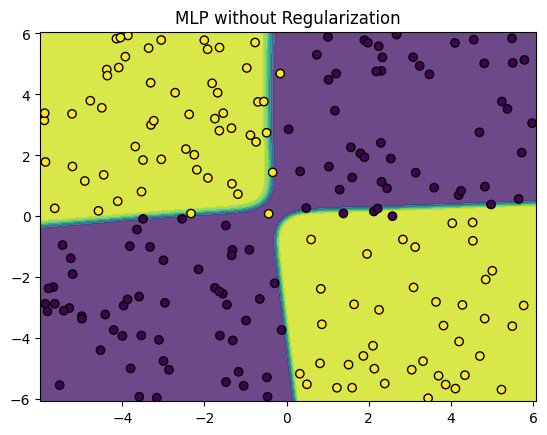

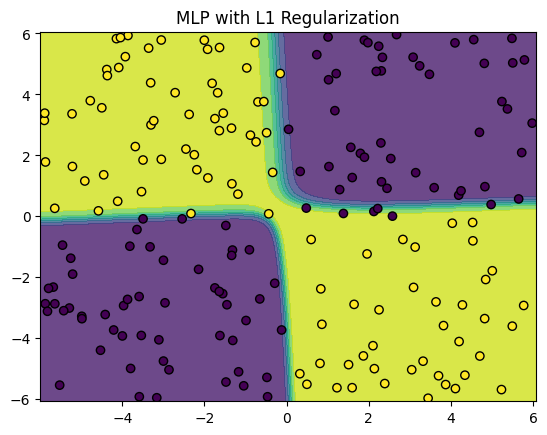

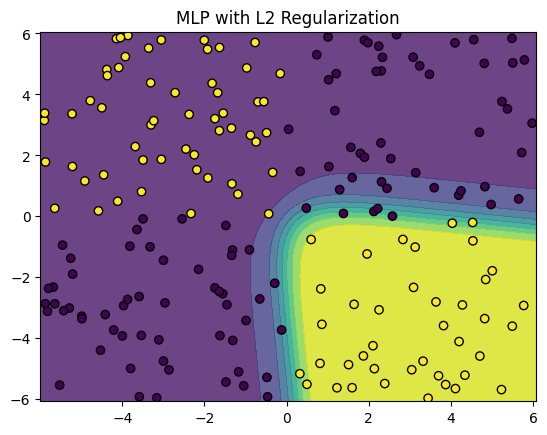

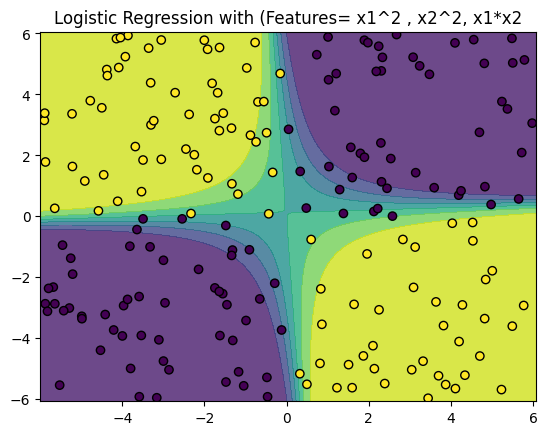

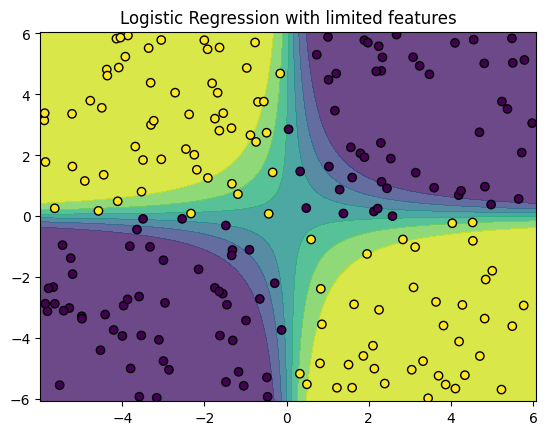

In [12]:
# Function to plot the decision surface of each model
def plot_decision_surface(model, X, y, feature_transformer=None, title="Decision Surface"):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Generate a grid of points and add additional features if necessary
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    if feature_transformer:
        grid = feature_transformer(grid)

    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plotting the decision surfaces for all models
# Assuming you have the XOR dataset `X_train` and `y_train` already loaded

# Example call for the MLP model (no regularization)
plot_decision_surface(model5, X_test, y_test, title="MLP without Regularization")

# Example call for the MLP model with L1 regularization
plot_decision_surface(model_final, X_test, y_test, title="MLP with L1 Regularization")

# Example call for the MLP model with L2 regularization
plot_decision_surface(model_final1, X_test, y_test, title="MLP with L2 Regularization")

# Example call for the Logistic Regression model with additional features
plot_decision_surface(logistic_model, X_test, y_test, feature_transformer=add_features, title="Logistic Regression with (Features= x1^2 , x2^2, x1*x2")

plot_decision_surface(logistic_model1, X_test, y_test, feature_transformer=add_features1, title="Logistic Regression with limited features" )
